In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=6,3
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Airbnb_Data.csv")

In [3]:
new_data=data[[ 
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       ]]

In [4]:
#rename columns
new_data.columns=[ 
       'Neighbourhood_Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country_Code', 'Room_Type',
       'Construction_Year', 'Price', 'Service_Fee', 'Minimum_Nights',
       'Number_Of_Reviews', 'Last_Review', 'Reviews_Per_Month',
       'Review_Rate_Number', 'Calculated_Host_Listings_Count',
       ]

In [5]:
new_data=new_data.dropna()

In [6]:
len(new_data)

84696

In [7]:
new_data["Neighbourhood_Group"].replace('brookln','Brooklyn', inplace=True)

In [8]:
new_data["Price"]=new_data["Price"].str.replace('[\$\,]', '').astype(int)

In [9]:
new_data["Service_Fee"]=new_data["Service_Fee"].str.replace('[\$\,]', '').astype(int)

In [10]:
new_data=new_data[new_data.Room_Type!='Hotel room']

In [11]:
new_data.Room_Type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
#dic={'Neighbourhood_Group':"n"}
avr_price=new_data.groupby(['Neighbourhood_Group', 'Room_Type']).aggregate(avr_price=('Price', 'mean'),
                                                                          max_price=('Price', 'max'),
                                                                          min_price=('Price', 'min'))


                                                                         
#avr_price.style.set_properties(subset=['Neighbourhood_Group'], **{'width': '10000px'})  
avr_price;

avr_price  max_price  min_price
Neighbourhood_Group Room_Type                                        
Bronx               Entire home/apt  630.460586       1200         50
                    Private room     631.851240       1198         54
                    Shared room      593.101124       1171         84
Brooklyn            Entire home/apt  625.955381       1200         50
                    Private room     629.425233       1200         50
                    Shared room      622.477759       1197         50
Manhattan           Entire home/apt  622.342879       1200         50
                    Private room     623.349472       1200         50
                    Shared room      636.900147       1199         50
Queens              Entire home/apt  624.686044       1200         50
                    Private room     634.442320       1200         50
                    Shared room      638.095070       1198         50
Staten Island       Entire home/apt  636.002387       1196         50
                    Private room     610.891089       1200         50
                    Shared room      695.250000        967        383

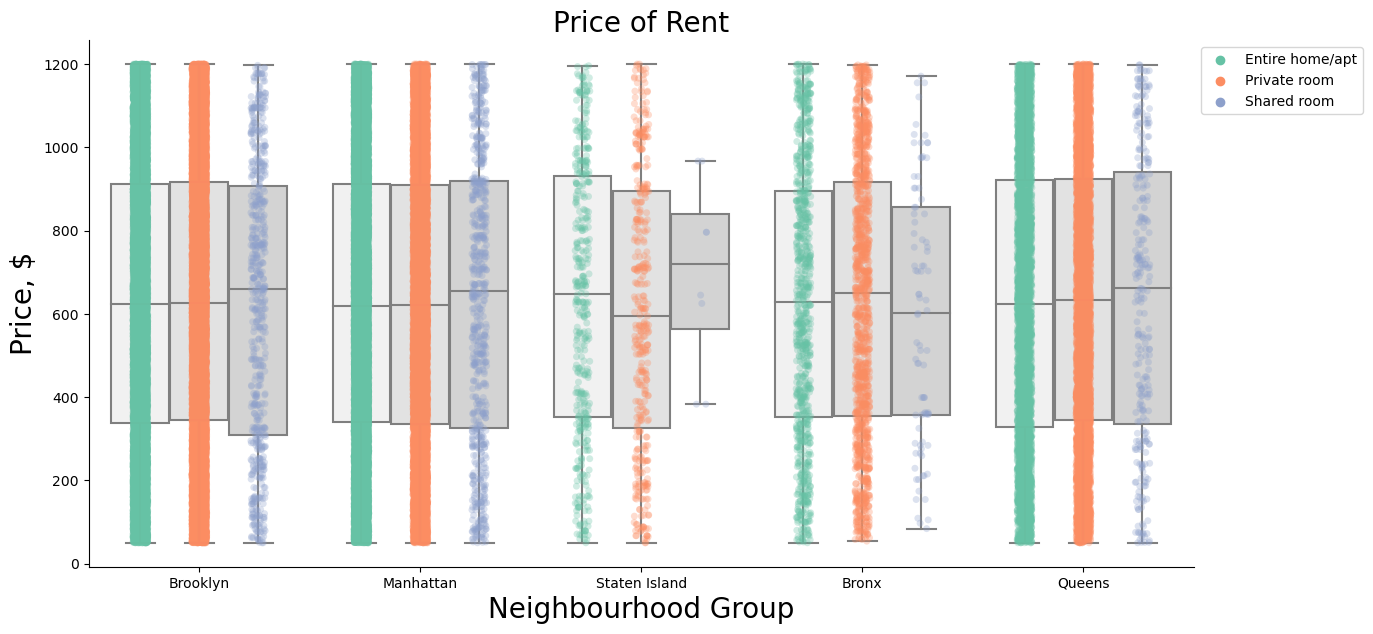

In [13]:

    
b=sns.catplot( data=new_data, x='Neighbourhood_Group', y='Price' , 
                 hue='Room_Type', kind="box",  height=6,
            aspect=2, legend = False,
               hue_order=['Entire home/apt',  'Private room', 'Shared room'], color="lightgrey",
                  showfliers = False)    



b=sns.stripplot( data=new_data, x='Neighbourhood_Group', y='Price' , 
                 hue='Room_Type',jitter=True,dodge=True, marker='o',
             palette="Set2" ,    alpha = 0.3, 
               hue_order=['Entire home/apt',  'Private room', 'Shared room'])  
      
              
# how to remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels =b.get_legend_handles_labels()
# specify just one legend
l = plt.legend( handles[3:6],labels[3:6], bbox_to_anchor=(1, 1.0), loc='upper left')
#plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
plt.title('Price of Rent', fontsize=20)    
plt.xlabel('Neighbourhood Group', fontsize=20)
plt.ylabel('Price, $', fontsize=20)
plt.show()  

In [14]:
import warnings 
warnings.filterwarnings('ignore')

In [15]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, clear_output
import panel as pn

In [16]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!hupyter serverextension enable voila --sys-prefix

In [17]:
sns.set_style("darkgrid")

In [18]:
plt.rcParams["figure.figsize"] = [6, 2.5]
plt.rcParams["figure.autolayout"] = True

In [19]:
#@pn.depends(opt)
def plot_histogram (opt): 
    """plots histogram
    params:
    =======
    bins: int
        histogram bins
    hue: str
        categorical columns to color 
    kde: bool 
        wether to show kde plot 
    palette: str
        palette of histogram
    x_range_1: tuple(int,int)
        x range of the plot 
    returns:
        histogram
    """
    fig= plt.figure()
   
    #plt.figure(dpi = 120)
    plt.hist([new_data[(new_data.Neighbourhood_Group==opt) & (new_data.Room_Type=="Private room")].Price, 
         new_data[(new_data.Neighbourhood_Group==opt) & (new_data.Room_Type=="Shared room")].Price, 
         new_data[(new_data.Neighbourhood_Group==opt) & (new_data.Room_Type=="Entire home/apt")].Price],     
         stacked=True, bins=30, label=["Private room","Shared room", "Entire home/apt"])
    
    
    plt.legend(  bbox_to_anchor=(1.3, 1), loc='upper right', fontsize="10")
    plt.title(f"Price for {opt}", fontsize=10)    
    plt.xlabel('Price', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.close()
    return fig

In [20]:
w1=interact(plot_histogram,
       opt = widgets.Dropdown(
    
    options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
   
            
            button_type='success'))

interactive(children=(Dropdown(description='opt', options=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten…

In [21]:
opt = widgets.Dropdown(
    
    options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
   
            
            button_type='success')

In [22]:
from ipywidgets import HBox, VBox

In [23]:
   opts = widgets.Select(
    
    options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
   
     

In [24]:
pn.extension()

Column
    [0] IPyWidget(Dropdown)
    [1] ParamFunction(function, _pane=Matplotlib)
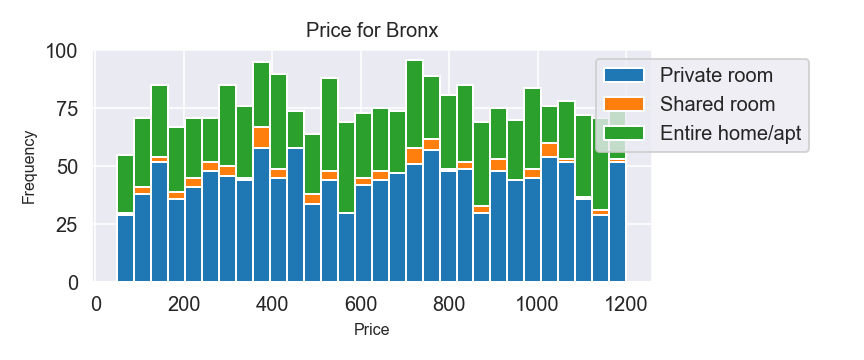

In [25]:

pn.Column(opt, pn.bind(plot_histogram, opt ))


In [1]:
jupyter nbconvert olya.ipynb --no-input --no-prompt

SyntaxError: invalid syntax (3520198943.py, line 1)